# tmp — sep24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from figures.imgs import plot_weights

device_idx = 1
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:1  ———  host: chewie

In [3]:
from base.distributions import Normal

In [4]:
dist = Normal(torch.randn(123, 128), torch.randn(123, 128))

In [8]:
z = dist.sample()

In [11]:
dist.log_prob(z)

tensor([[-2.9170, -1.0197, -2.3397,  ..., -1.4768, -1.3463, -2.3250],
        [-3.5510, -1.8649, -0.1023,  ..., -2.5057, -1.6227, -1.6194],
        [-0.0658, -2.6664, -2.1462,  ..., -1.8712, -2.5295, -0.3952],
        ...,
        [-2.8009,  0.1837, -1.7608,  ..., -0.9280, -0.2967, -3.0460],
        [-1.3645, -4.0890, -0.9005,  ..., -3.3610, -1.5527, -0.5601],
        [-0.4687, -1.9157, -1.1375,  ..., -0.9175, -0.9015, -2.6066]])

In [3]:
from vae.layers import _build_mlp

In [16]:
dec_1 = _build_mlp(1024, 3 * 32**2, activation_fn='silu')
dec_2 = _build_mlp(1200, 3 * 32**2, activation_fn='silu')
dec_3 = _build_mlp(2048, 3 * 32**2, activation_fn='silu')

print_num_params(dec_1)
print(dec_1)
print('-' * 110)
print('\n')

print_num_params(dec_2)
print(dec_2)
print('-' * 110)
print('\n')

print_num_params(dec_3)
print(dec_3)
print('-' * 110)
print('\n')

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  5.2 Mil   |
|     ———     |    ———     |
|      0      |  1.1 Mil   |
|      2      |  1.1 Mil   |
|      4      |  3.1 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=1024, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  12.9 Mil  |
|     ———     |    ———     |
|      0      |  2.5 Mil   |
|      2      |  4.2 Mil   |
|      4      |  6.3 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=1200, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  14.7 Mil  |
|     ———     |    ———     |
|      0      |  4.2 Mil   |
|      2      |  4.2 Mil   |
|      4      |  6.3 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=2048, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

In [8]:
print(_build_mlp(128, 28**2, activation_fn='silu'))

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
)

In [6]:
print(_build_mlp(128, 3 * 32**2, activation_fn='silu'))

Sequential(
  (0): Linear(in_features=128, out_features=512, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=512, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

In [13]:
trn, vld, _ = make_dataset('CIFAR10', device=device)

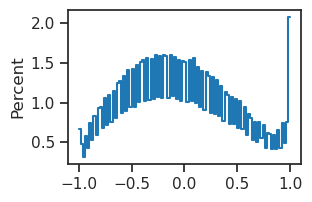

In [37]:
data = vld.tensors[0]
x2p = tonp(data[:400].ravel())
histplot(x2p, bins=np.linspace(-1, 1, 101), stat='percent');

In [27]:
mse = nn.MSELoss(reduction='none')

In [30]:
torch.sum(mse(data[0], data[1]))

tensor(2172.9639, device='cuda:1')

In [40]:
torch.sum(mse(data[0] * 10, data[1] * 10))

tensor(217296.3906, device='cuda:1')

<Axes: ylabel='Percent'>

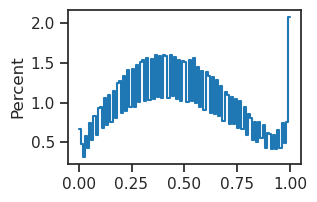

In [38]:
x2p_shifted = (1 + x2p) / 2
histplot(x2p_shifted, bins=np.linspace(0, 1, 101), stat='percent')

## Fit Amortized Gaussian quick

```<fit>```

In [3]:
model_type = 'gaussian'
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'mlp|mlp')

seq_len = 1
cfg_vae['seq_len'] = seq_len
cfg_tr['batch_size'] = 1000

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

tr.n_iters

24000

In [5]:
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")

gaussian_MNIST_t-1_z-[128]_<mlp|mlp>
b1000-ep400-lr(0.002)_beta(1:0x0.1)_gr(50)_(2024_09_17,23:37)

In [10]:
tr.train()

epoch # 400, avg loss: 26.061427: 100%|███████| 400/400 [05:35<00:00,  1.19it/s]


```</fit>```

In [23]:
import torchvision

torchvision.datasets.SVHN(root=add_home('Datasets/SVHN'), split='train', download=True)

Using downloaded and verified file: /home/hadi/Datasets/SVHN/train_32x32.mat


Dataset SVHN
    Number of datapoints: 73257
    Root location: /home/hadi/Datasets/SVHN
    Split: train

In [11]:
vld = torchvision.datasets.SVHN(root=add_home('Datasets/SVHN'), split='test', download=True)

Using downloaded and verified file: /home/hadi/Datasets/SVHN/test_32x32.mat


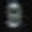

In [29]:
vld[40][0]

In [37]:
load_dir = add_home('Datasets')

kwargs = {}
defaults = dict(grey=True)
kwargs = setup_kwargs(defaults, kwargs)


transform = [
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Grayscale()
    if kwargs['grey'] else None,
    torchvision.transforms.Normalize(
        mean=(0.5,) * 3, std=(0.5,) * 3)
    if not kwargs['grey'] else None,
    # ToDevice(device=device),
]
transform = torchvision.transforms.Compose([
    t for t in transform if t is not None
])

# transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
# ])
# make dataset
kws = dict(root=pjoin(load_dir, 'SVHN'), transform=transform)
trn = torchvision.datasets.SVHN(split='train', **kws)
vld = torchvision.datasets.SVHN(split='test', **kws)

In [38]:
x = tonp(vld[6][0])

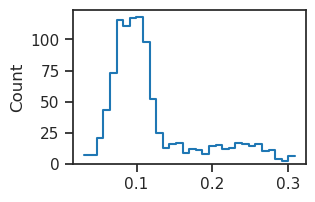

In [39]:
histplot(x.ravel());

In [40]:
x.shape

(1, 32, 32)

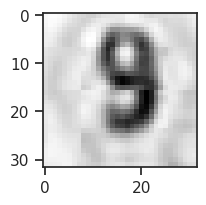

In [41]:
plt.imshow(x.squeeze(), cmap='Greys');

In [51]:
x.shape

(3, 32, 32)

In [3]:
%%time

trn, vld, _ = make_dataset('SVHN', device=device, grey=True)
trn, vld, _ = make_dataset('SVHN', device=device, grey=False)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed

CPU times: user 1min 1s, sys: 1.16 s, total: 1min 2s
Wall time: 1min 2s


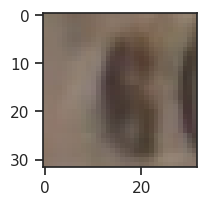

In [15]:
x2p = tonp(trn.tensors[0][51])
x2p = x2p.transpose(1, 2, 0)
x2p = (1 + x2p) / 2

plt.imshow(x2p)
plt.show()

In [16]:
trn, vld, _ = make_dataset('SVHN', 'Datasets', device=device, grey=True)

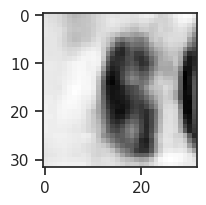

In [21]:
x2p = tonp(trn.tensors[0][51].squeeze())
plt.imshow(x2p, cmap='Greys_r')
plt.show()

In [4]:
trn, vld, _ = make_dataset('Omniglot', 'Datasets', device=device)

In [8]:
trn.tensors[0].shape, vld.tensors[0].shape

(torch.Size([19280, 1, 28, 28]), torch.Size([13180, 1, 28, 28]))

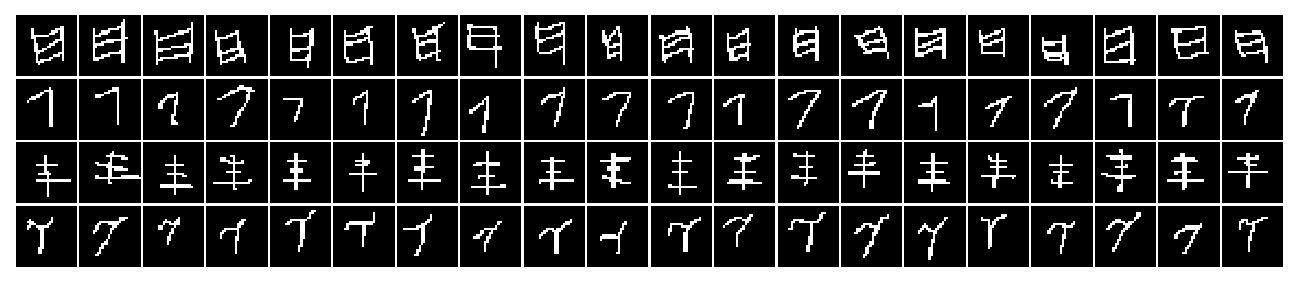

In [11]:
_ = plot_weights(trn.tensors[0][:80], nrows=4)

In [4]:
from base.dataset import torchvision, ToDevice, _process, InvertBinaryPILImage
load_dir = add_home('Datasets')

In [5]:
kws_resize = dict(
    size=28,
    antialias=True,
    interpolation=torchvision.transforms.functional.InterpolationMode.NEAREST,
)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(**kws_resize),
    InvertBinaryPILImage(),
    torchvision.transforms.ToTensor(),
    ToDevice(device=device),
])
kws = dict(root=load_dir, transform=transform, download=False)

In [6]:
ds = torchvision.datasets.Omniglot(background=False, **kws)

In [7]:
ds[5][0].shape

torch.Size([1, 28, 28])

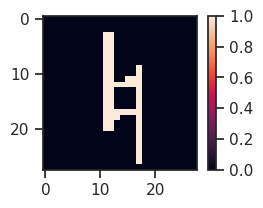

In [8]:
x2p = tonp(ds[5][0].squeeze())
plt.imshow(x2p)
plt.colorbar()

<Axes: ylabel='Count'>

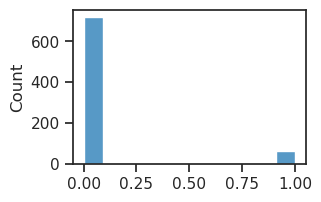

In [41]:
sns.histplot(x2p.ravel())

In [ ]:

for split in ['byclass', 'bymerge', 'balanced', 'letters', 'digits', 'mnist']:
    trn = torchvision.datasets.EMNIST(split=split, train=True, **kws)
    vld = torchvision.datasets.EMNIST(split=split, train=False, **kws)
torchvision.datasets.Omniglot()

In [3]:
%%time

trn, vld, _ = make_dataset('EMNIST', 'Datasets', device=device)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/EMNIST/processed

CPU times: user 30.7 s, sys: 747 ms, total: 31.4 s
Wall time: 25.3 s


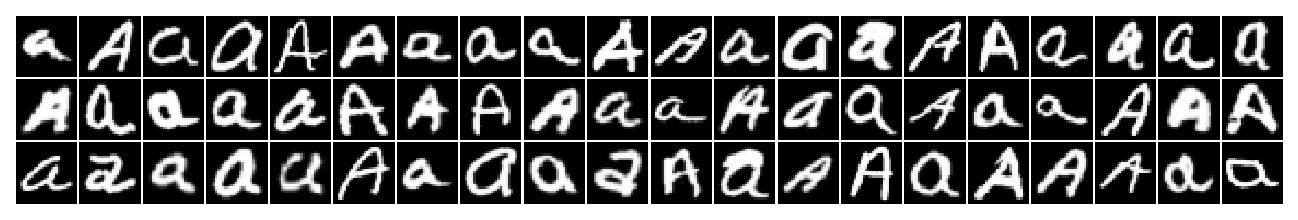

In [6]:
_ = plot_weights(vld.tensors[0][:60], nrows=3)

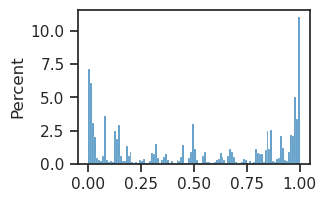

In [11]:
x2p = tonp(vld.tensors[0].ravel())
x2p = x2p[x2p > 0.001]
sns.histplot(x2p, stat='percent');

In [10]:
torch.unique(vld.tensors[1])

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26])

In [28]:
dec = _build_mlp(128, 784, 'relu', 2)
print(dec)

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
)

In [29]:
dec = _build_mlp(128, 784, 'relu', 2, True)
print(dec)

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=784, out_features=784, bias=True)
)

In [8]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['track_stats'] = True

cfg_tr['epochs'] = 300
cfg_tr['batch_size'] = 250
cfg_tr['kl_beta'] = 4.0
cfg_tr['kl_anneal_portion'] = 0.1

vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [9]:
tr.n_iters

123600

In [10]:
vars(tr.cfg)

{'lr': 0.002,
 'epochs': 300,
 'batch_size': 250,
 'file_name': None,
 'warm_restart': 0,
 'warmup_epochs': 5,
 'optimizer': 'adamax_fast',
 'optimizer_kws': {'weight_decay': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-08},
 'scheduler_type': 'cosine',
 'scheduler_kws': {'T_max': 295.0, 'eta_min': 1e-05},
 'ema_rate': None,
 'grad_clip': 500,
 'chkpt_freq': 50,
 'eval_freq': 20,
 'log_freq': 10,
 'use_amp': False,
 'method': 'mc',
 'kl_beta': 4.0,
 'kl_beta_min': 0.0001,
 'kl_balancer': None,
 'kl_time_adjuster': None,
 'kl_anneal_cycles': 0,
 'kl_anneal_portion': 0.1,
 'kl_const_portion': 0.001,
 'lambda_anneal': False,
 'lambda_init': 0.0,
 'lambda_norm': 0.0,
 'temp_anneal_portion': 0.5,
 'temp_anneal_type': 'lin',
 'temp_start': 1.0,
 'temp_stop': 0.05}

In [11]:
tr.train()

epoch # 300, avg loss: 92.988861: 100%|█████| 300/300 [1:24:08<00:00, 16.83s/it]


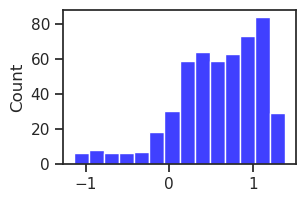

In [14]:
log_rate = tonp(tr.model.layer.log_rate).ravel()
sns.histplot(log_rate, color='b');

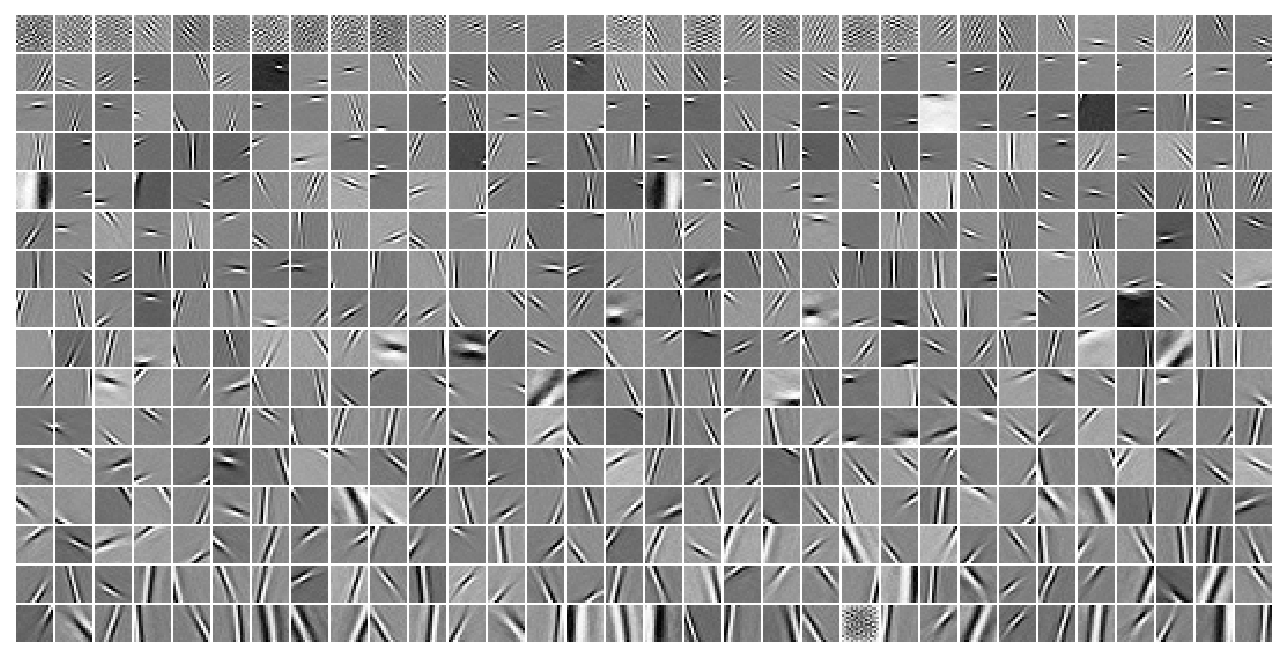

In [15]:
tr.model.show(order=np.argsort(log_rate));

In [16]:
%%time

kws = dict(
    seq_total=1000,
    seq_batch_sz=1000,
    n_data_batches=None,
    # active=~dead,
)
results = tr.analysis(**kws)

100%|███████████████████████████████| 104/104 [07:35<00:00,  4.38s/it]


CPU times: user 7min 23s, sys: 25.6 s, total: 7min 49s
Wall time: 7min 49s


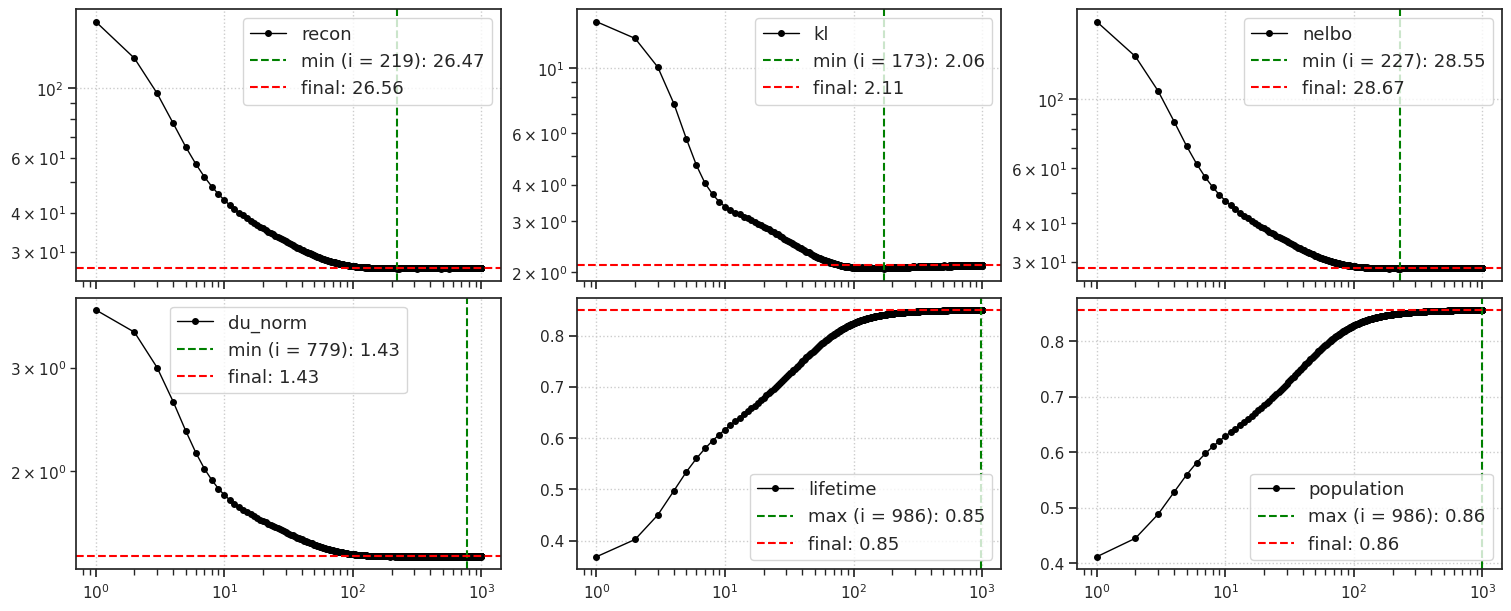

In [19]:
from figures.analysis import plot_convergence

plot_convergence(results, color='k');

In [3]:
model_name = 'poisson_uniform_c(-2)_MNIST_t-10_z-[128]_<jacob|mlp+b>'
gold_standard = 'warm1_clamp-u:(8.0)-du:(10.0)_b200-ep500-lr(0.002)_beta(5:0x0.3)_temp(0.05:lin-0.5)_gr(100)_(2024_09_11,12:29)'
tr, meta = load_model(model_name=model_name, fit_name=gold_standard, device=device, checkpoint=-1)
meta['checkpoint']

500

In [7]:
from vae.train_vae import _prep
self = tr
kwargs = {'full_data': True}
temp = model2temp(self.model.cfg.type)
kwargs = setup_kwargs({'temp': temp}, kwargs)
data, loss, etc = self.forward('vld', **kwargs)

In [8]:
list(loss)

['kl', 'kl_diag', 'recon', 'nelbo']

In [12]:
loss_perdim = {
    'kl_perdim': _prep(loss['kl'], sum(self.model.cfg.n_latents)),
    'recon_perdim': _prep(loss['recon'], np.prod(self.model.cfg.input_sz)),
}
loss_perdim['nelbo_perdim'] = {
    k: recon + loss_perdim['kl_perdim'][k] for
    k, recon in loss_perdim['recon_perdim'].items(),
}
# loss_perdim['nelbo_perdim'] = loss_perdim['kl_perdim'] + loss_perdim['recon_perdim']

In [13]:
loss_perdim

{'kl_perdim': {'0': 0.04536516219377518,
  '1': 0.04201909899711609,
  '2': 0.025120383128523827,
  '3': 0.013111178763210773,
  '4': 0.00826082844287157,
  '5': 0.006098019424825907,
  '6': 0.00485973572358489,
  '7': 0.0040818313136696815,
  '8': 0.0036526790354400873,
  '9': 0.0033205661457031965,
  'avg': 0.01558894831687212},
 'recon_perdim': {'0': 0.05425256125781001,
  '1': 0.03282374751811125,
  '2': 0.022854364648157238,
  '3': 0.0184161833354405,
  '4': 0.016011866987967978,
  '5': 0.014510059843257981,
  '6': 0.013528305657055914,
  '7': 0.012864774587203046,
  '8': 0.012386463126357721,
  '9': 0.011990906024465755,
  'avg': 0.020963923298582737},
 'nelbo_perdim': {'0': 0.09961772345158518,
  '1': 0.07484284651522734,
  '2': 0.047974747776681065,
  '3': 0.03152736209865127,
  '4': 0.02427269543083955,
  '5': 0.02060807926808389,
  '6': 0.018388041380640804,
  '7': 0.016946605900872727,
  '8': 0.01603914216179781,
  '9': 0.015311472170168951,
  'avg': 0.036552871615454854}}

In [18]:
loss_avg = {
    k: _prep(v) for k, v in
    loss.items() if k != 'kl_diag'
}

In [19]:
list(loss_avg)

['kl', 'recon', 'nelbo']

In [20]:
loss_avg['kl']

{'0': 5.8122654,
 '1': 5.358565,
 '2': 3.199888,
 '3': 1.6933955,
 '4': 1.061279,
 '5': 0.78092617,
 '6': 0.62447363,
 '7': 0.5291324,
 '8': 0.46189117,
 '9': 0.41911054,
 'avg': 1.9940926730632782}

In [21]:
loss_avg['recon']

{'0': 42.396095,
 '1': 25.748032,
 '2': 17.876572,
 '3': 14.424323,
 '4': 12.571443,
 '5': 11.395431,
 '6': 10.612431,
 '7': 10.097219,
 '8': 9.694196,
 '9': 9.405854,
 'avg': 16.422159481048585}

In [ ]:
self.model.

In [3]:
from base.distributions import Poisson

In [4]:
dist = Poisson(log_rate=torch.randn(1000, 512) * 0.6, temp=0.1)

In [5]:
%timeit dist.rsample()

52.2 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
dist.rate.max()

tensor(14.5779)

In [17]:
max_rate = dist.rate.max().item()
pois = sp_stats.poisson(max_rate)
n_exp = pois.ppf(1.0 - 1e-6)

In [18]:
n_exp

39.0

In [7]:
%timeit Poisson(log_rate=torch.randn(1000, 512) * 0.6, temp=0.1)

4.92 ms ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['init_scale'] = 1e-2
cfg_vae['seq_len'] = 8

cfg_tr['lr'] = 2e-3
cfg_tr['epochs'] = 600
cfg_tr['batch_size'] = 500
cfg_tr['kl_beta'] = 8.0

cfg_tr['kl_balancer'] = None
cfg_tr['kl_time_adjuster'] = None

In [6]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [15]:
alphas = F.softplus(vae.base_alphas)
alphas

tensor([[0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931]],
       device='cuda:0', grad_fn=<SoftplusBackward0>)

In [13]:
F.normalize(alphas, p=1.0).mul(vae.cfg.seq_len)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.]], device='cuda:0',
       grad_fn=<MulBackward0>)

100%|███████████████████████| 561753746/561753746 [00:29<00:00, 18945505.26it/s]


Extracting /home/hadi/Datasets/EMNIST/raw/gzip.zip to /home/hadi/Datasets/EMNIST/raw
CPU times: user 25.6 s, sys: 3.85 s, total: 29.5 s
Wall time: 38.5 s


In [71]:
split = 'letters'
vld = torchvision.datasets.EMNIST(split=split, train=False, **kws)
vld = _process(vld)

In [74]:
.shape

(80, 1, 28, 28)

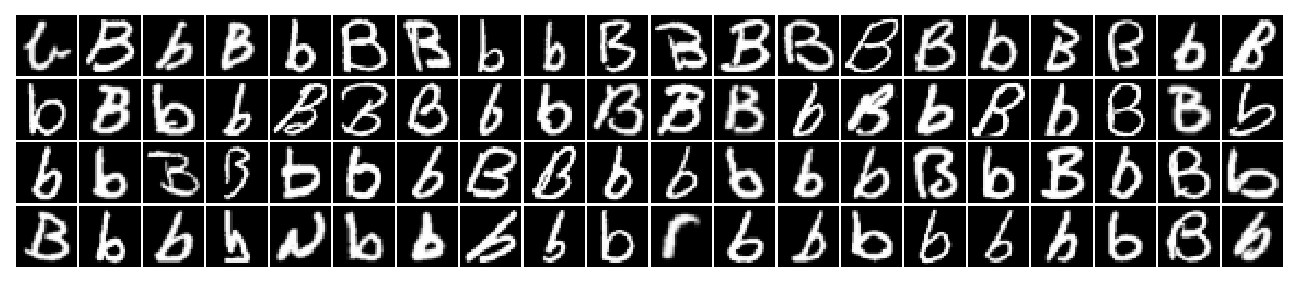

In [77]:
_ = plot_weights(tonp(vld[0][1000:1080]).transpose(0, 1, 3, 2), nrows=4)

In [78]:
vld[1][1000:1080]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.transpose()

In [3]:
%%time

trn, vld, tst = make_dataset('CIFAR10', 'Datasets', device=device, grey=True)
trn, vld, tst = make_dataset('CIFAR10', 'Datasets', device=device, grey=False)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

CPU times: user 1min 12s, sys: 1.65 s, total: 1min 14s
Wall time: 1min 14s


In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['init_scale'] = 1e-2
cfg_vae['seq_len'] = 8

cfg_tr['lr'] = 2e-3
cfg_tr['epochs'] = 600
cfg_tr['batch_size'] = 500
cfg_tr['kl_beta'] = 8.0

cfg_tr['kl_time_adjuster'] = 'log'

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [5]:
kl_batch = torch.sum(kl, dim=2)
kl_batch.shape

torch.Size([500, 10])

torch.Size([10])

In [12]:
kl_batch.mul_(tr.alphas_time.unsqueeze(0))

tensor([[2.9488e-01, 3.5559e+00, 1.4340e+01,  ..., 6.9668e+01, 7.7290e+01,
         1.3579e+02],
        [3.0527e-01, 3.3412e+00, 1.2325e+01,  ..., 8.6450e+01, 6.8390e+01,
         1.0793e+02],
        [3.3421e-01, 5.2285e+00, 1.3307e+01,  ..., 9.0537e+01, 1.2135e+02,
         9.4812e+01],
        ...,
        [2.1673e-01, 1.9556e+00, 1.1784e+01,  ..., 3.6917e+01, 4.4717e+01,
         4.4402e+01],
        [2.7495e-01, 2.5324e+00, 6.3079e+00,  ..., 5.4701e+01, 1.0189e+02,
         1.8120e+02],
        [1.5860e-01, 1.1411e+00, 5.1360e+00,  ..., 3.8511e+01, 2.7253e+01,
         5.9001e+01]], device='cuda:0', grad_fn=<MulBackward0>)

In [6]:
kl_balanced, gamma = kl_balancer(
    kl_batch=kl_batch,
    alpha=self.alphas,
    balance=True,
)
kl_balanced.shape

torch.Size([500])

In [3]:
from vae.config_vae import _KL_ADJUSTER_CHOICES
_KL_ADJUSTER_CHOICES

[None, 'equal', 'linear', 'sqrt', 'log']

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([0.2222, 0.4444, 0.6667, 0.8889, 1.1111, 1.3333, 1.5556, 1.7778])
mean = 1.0

sqrt:
tensor([0.4906, 0.6938, 0.8498, 0.9812, 1.0971, 1.2018, 1.2981, 1.3877])
mean = 1.0

log:
tensor([0.4300, 0.7281, 0.9024, 1.0261, 1.1221, 1.2005, 1.2667, 1.3242])
mean = 1.0

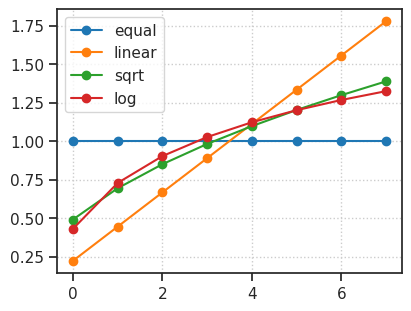

In [4]:
fig, ax = create_figure(1, 1, (4, 3))
for fun in _KL_ADJUSTER_CHOICES[1:]:
    alphas = kl_balancer_coeff(t=8, fun=fun, flip=False, normalize=True)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")
    ax.plot(alphas, marker='o', label=fun)
ax.legend()
ax.grid()
plt.show()

In [3]:
for fun in ['equal', 'linear', 'sqrt', 'square', 'exp', 'log']:
    alphas = kl_balancer_coeff(t=10, fun=fun, flip=False)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
mean = 5.5

sqrt:
tensor([1.0000, 1.4142, 1.7321, 2.0000, 2.2361, 2.4495, 2.6458, 2.8284, 3.0000,
        3.1623])
mean = 2.2468278408050537

square:
tensor([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])
mean = 38.5

exp:
tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
mean = 1281.830810546875

log:
tensor([1.0000, 1.6931, 2.0986, 2.3863, 2.6094, 2.7918, 2.9459, 3.0794, 3.1972,
        3.3026])
mean = 2.5104410648345947

In [4]:
for fun in ['equal', 'linear', 'sqrt', 'square', 'exp', 'log']:
    alphas = kl_balancer_coeff(t=10, fun=fun, flip=False, normalize=True)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([0.1818, 0.3636, 0.5455, 0.7273, 0.9091, 1.0909, 1.2727, 1.4545, 1.6364,
        1.8182])
mean = 1.0

sqrt:
tensor([0.4451, 0.6294, 0.7709, 0.8901, 0.9952, 1.0902, 1.1775, 1.2589, 1.3352,
        1.4074])
mean = 1.0

square:
tensor([0.0260, 0.1039, 0.2338, 0.4156, 0.6494, 0.9351, 1.2727, 1.6623, 2.1039,
        2.5974])
mean = 0.9999998807907104

exp:
tensor([7.8013e-04, 2.1206e-03, 5.7645e-03, 1.5669e-02, 4.2594e-02, 1.1578e-01,
        3.1473e-01, 8.5552e-01, 2.3255e+00, 6.3215e+00])
mean = 1.0

log:
tensor([0.3983, 0.6744, 0.8360, 0.9505, 1.0394, 1.1121, 1.1735, 1.2267, 1.2736,
        1.3155])
mean = 1.0